In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import pandas as pd
from tqdm import tqdm
import numpy as np
print("success")

success


In [2]:
if os.getcwd()[-9:] == "notebooks":
    os.chdir(os.path.dirname(os.getcwd()))
os.getcwd()

'/home/koos/Documents/timeseries_transfer_learning'

In [3]:
def normalize_list(lst):
    lst = np.array(lst)
    min_value = min(lst)
    max_value = max(lst)
    if min_value == max_value:
        return lst, (min_value, max_value)
    else:
        return list(((lst - min_value) / (max_value - min_value))), (min_value, max_value)

In [4]:
def get_timeseries(path, TIMESERIES_LENGTH=518, BREAK_BETWEEN_WINDOW_STARTS=300):
    files = os.listdir(path)

    all_timeseries = []
    #all_factors = []
    for file_index in tqdm(range(len(files))):
        file = files[file_index]

        df = pd.read_parquet(os.path.join(path, file))
        data = np.array(df).flatten()
        if len(data) < TIMESERIES_LENGTH:
            continue

        for i in range(0, len(data), BREAK_BETWEEN_WINDOW_STARTS):
            start_index = i
            end_index = start_index + TIMESERIES_LENGTH

            if end_index <= len(data):
                selection = data[start_index:end_index]
                #selection, factors = normalize_list(selection)
                all_timeseries.append(selection)
                #all_factors.append(factors)
    return all_timeseries#, all_factors

In [7]:
darts = np.array(get_timeseries("data/processed/darts"))
darts_mean = np.mean(darts, axis=0)

weather = np.array(get_timeseries("data/processed/weather"))
weather_mean = np.mean(weather, axis=0)

stocks = np.array(get_timeseries("data/processed/stocks"))
stocks_mean = np.mean(stocks, axis=0)

# Plotting all on the same figure
plt.plot(darts_mean, label='Darts')
plt.plot(weather_mean, label='Weather')
plt.plot(stocks_mean, label='Stocks')

# Adding labels, legend, and title
plt.xlabel('Timestep')
plt.ylabel('Mean Value')
plt.title('Combined Mean Timeseries')
plt.legend()

# Show the plot
plt.show()


100%|██████████| 49238/49238 [03:31<00:00, 232.95it/s] 


In [ ]:
correlation_matrix = np.corrcoef((stocks_mean, weather_mean, darts_mean))
print("Correlation Matrix for (Stock, Weather, Darts)")
correlation_matrix

Correlation Matrix for (Stock, Weather, Darts)


array([[ 1.        ,  0.2214926 ,  0.05885982],
       [ 0.2214926 ,  1.        , -0.10576488],
       [ 0.05885982, -0.10576488,  1.        ]])

# Plot Autocorrelation

In [6]:
darts = np.array(get_timeseries("data/processed/darts"))
weather = np.array(get_timeseries("data/processed/weather"))
stocks = np.array(get_timeseries("data/processed/stocks"))

100%|██████████| 49238/49238 [01:40<00:00, 491.75it/s]


In [21]:
sample_size = 5000
correl_coefs_weather = []
correl_coefs_darts = []

sample_stocks = np.random.choice(len(stocks), size=sample_size, replace=False)
sample_weather = np.random.choice(len(weather), size=sample_size, replace=False)
sample_darts = np.random.choice(len(darts), size=sample_size, replace=False)

for i in tqdm(range(sample_size)):
    for j in range(i, sample_size, 1):
        if i == j:
            continue

        _stock = stocks[sample_stocks[j]]
        _weather = weather[sample_weather[j]]
        _darts = darts[sample_darts[j]]

        correl_coefs_weather.append(np.corrcoef((_stock, _weather))[0, 1])
        correl_coefs_darts.append(np.corrcoef((_stock, _darts))[0, 1])

  0%|          | 0/5000 [00:00<?, ?it/s]

100%|██████████| 5000/5000 [22:33<00:00,  3.69it/s] 


In [22]:
print("Correlation between stocks and weather:", np.mean(np.abs(correl_coefs_weather)))
print("Correlation between stocks and darts:", np.mean(np.abs(correl_coefs_darts)))

Correlation between stocks and weather: 0.23654428544863584
Correlation between stocks and darts: 0.17710402742572148


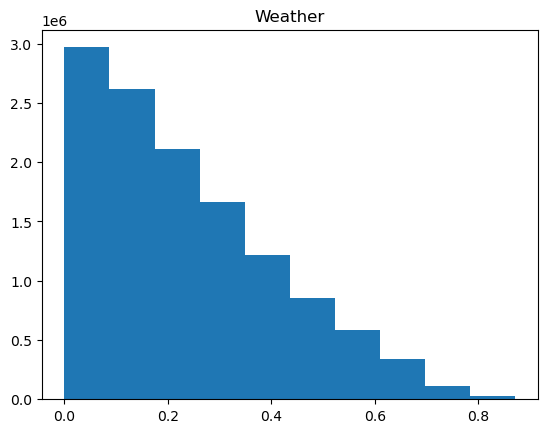

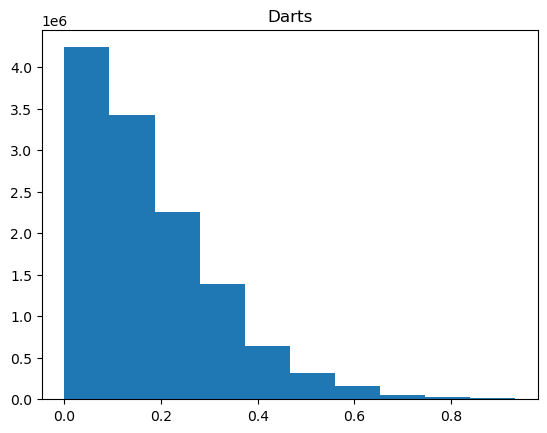

In [23]:
plt.hist(np.abs(correl_coefs_weather))
plt.title("Weather")
plt.show()
plt.hist(np.abs(correl_coefs_darts))
plt.title("Darts")
plt.show()